# <font color='056938'> **Librerias** </font>

In [1]:
import pandas as pd
from google.colab import drive
import sys
import os
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score

In [2]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Mod2/Salud"

Mounted at /content/drive


In [3]:
ruta = "/content/drive/MyDrive/Mod2/Salud/data/df_limpia.xlsx"

#leer excel
df = pd.read_excel(ruta)
df

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627000,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351000,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,0.416104,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171000,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340000,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245000,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349000,47,1


In [4]:
sys.path.append(path)

from b_preprocesamiento import preparar_datos #Importar función que contiene los datos de entrenamiento, test y validación

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_train: (537, 8), y_train: (537,)
 X_val: (154, 8), y_val: (154,)
 X_test: (77, 8), y_test: (77,)


In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = preparar_datos(df)

In [19]:
X_train

array([[-8.44885053e-01, -8.77388580e-01, -1.02619983e+00, ...,
        -1.24550573e+00, -6.61394412e-01, -9.56461683e-01],
       [ 3.42980797e-01, -5.48615627e-01, -3.35182392e-02, ...,
         6.46593976e-01, -1.08931955e+00, -4.45935165e-01],
       [-1.14185152e+00,  4.37703231e-01, -3.64412102e-01, ...,
         1.43254309e+00, -2.16521741e-01, -7.86286177e-01],
       ...,
       [ 1.82781311e+00, -6.80124808e-01,  1.12461028e+00, ...,
         1.91284532e+00,  0.00000000e+00,  4.04942367e-01],
       [-1.14185152e+00,  6.34967003e-01,  1.17557115e-15, ...,
         1.44709770e+00, -8.94422954e-01, -3.60847411e-01],
       [-1.14185152e+00,  1.08930278e-01,  1.95184494e+00, ...,
        -1.44927032e+00, -6.52920647e-01, -1.04154944e+00]])

# <font color='056938'> **Árboles de desición** </font>

In [6]:
# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

<font color='056938'> **Predicciones con los datos de entrenamiento**</font>

[[349   0]
 [  0 188]]


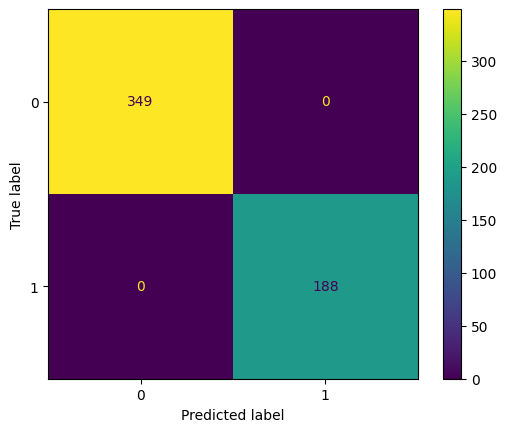

In [7]:
# Hacer predicciones en el conjunto de prueba
y_train_pred = tree_model.predict(X_train)

# Generar la matriz de confusión
cm_train = confusion_matrix(y_train, y_train_pred, labels=tree_model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tree_model.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_train)

In [8]:
tn, fp, fn, tp = cm_train.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy train: 1.0
Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0


<font color='056938'> **Predicciones con los datos de validación**</font>

[[73 26]
 [17 38]]


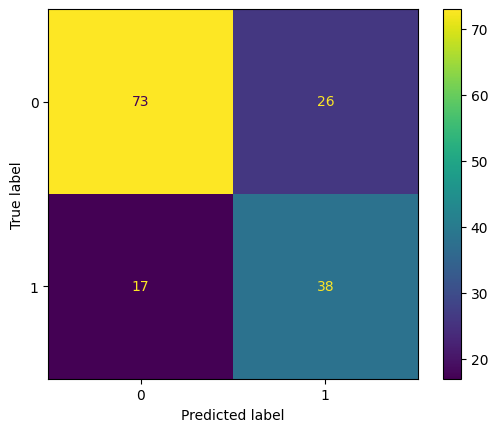

In [9]:
# Hacer predicciones en el conjunto de prueba
y_val_pred = tree_model.predict(X_val)

# Generar la matriz de confusión
cm_val = confusion_matrix(y_val, y_val_pred, labels=tree_model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=tree_model.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_val)

In [10]:
tn, fp, fn, tp = cm_val.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy val: {accuracy_score(y_val, y_val_pred)}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy val: 0.7207792207792207
Precision: 0.59375
Recall: 0.6909090909090909
Especificidad: 0.7373737373737373
F1 score: 0.6386554621848739


Las predicciones de los datos de entrenamiento y las prediciones de los datos de validación evidenicia que hay problemas de sobreajuste.                      Para mejorar el modelo anterior se opta por utilizar restricciones de parada


<font color='056938'> **Modelo 2: árbol de decición con restricciones de parada**</font>

Se construye un modelo, aplicando restricciones específicas en la estructura de los árboles. Estas restricciones incluyen la definición de una profundidad máxima y el establecimiento de un número máximo de nodos hoja. Estas limitaciones buscan reducir el riesgo de sobreajuste.

In [11]:
#entrenar el modelo con restricciones
tree_model2 = DecisionTreeClassifier(
    random_state=42,   # Para reproducibilidad
    max_depth=5,       # Limitar la profundidad del árbol
    min_samples_split=10,  # Mínimo 10 muestras para dividir un nodo
    min_samples_leaf=5,    # Mínimo 5 muestras en cada hoja
    max_leaf_nodes=20      # Máximo 20 hojas en el árbol
)

tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [12]:
# Hacer predicciones con conjunto de entrenaminto y validación.
y_train_pred = tree_model2.predict(X_train)
y_val_pred = tree_model2.predict(X_val)
print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy val: {accuracy_score(y_val, y_val_pred)}")

Accuracy train: 0.8044692737430168
Accuracy val: 0.7467532467532467


Se puede evidenciar que aplicando restricciones de parada, el sobreajuste disminuye, los datos de entrenamiento y validación se encuentran mas cerca según el Accuracy.


<font color='056938'> **Predicciones con los datos de prueba**</font>

[[47  5]
 [15 10]]


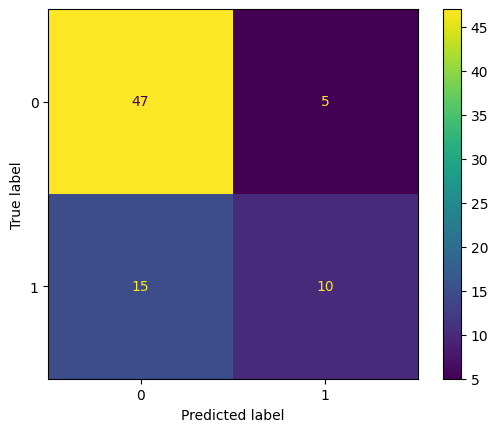

In [13]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = tree_model2.predict(X_test)

# Generar la matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred, labels=tree_model2.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tree_model2.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_test)

In [14]:
tn, fp, fn, tp = cm_test.ravel()

Accuracy_ar= accuracy_score(y_test, y_test_pred)
precision_ar = tp / (tp + fp)
recall_ar = tp / (tp + fn)
especificidad_ar= tn / (fp + tn)
f1_score_ar = 2*(precision_ar*recall_ar)/(precision_ar+recall_ar)

print(f"Accuracy test: {Accuracy_ar}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy test: 0.7402597402597403
Precision: 0.59375
Recall: 0.6909090909090909
Especificidad: 0.7373737373737373
F1 score: 0.6386554621848739


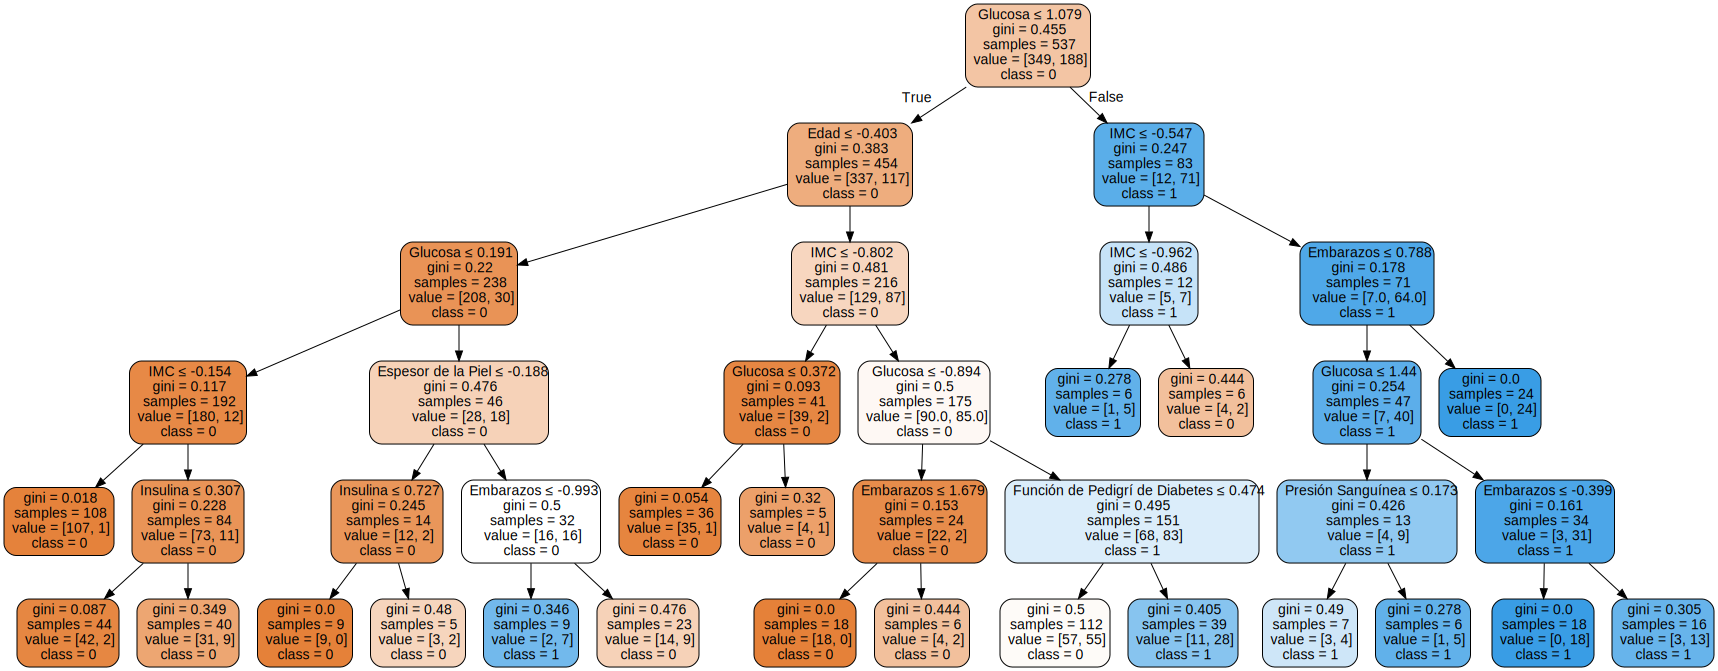

In [24]:
#se especifica explicativas y decisión
X = df.drop(columns=['Diagnostico'])  # Características
y = df['Diagnostico']  # Etiqueta

# Exportar el gráfico del árbol en formato DOT
dot_data = tree.export_graphviz(
    tree_model2,
    feature_names=X.columns,
    class_names=[str(c) for c in set(y)],
    filled=True,
    rounded=True,
    special_characters=True
)

# Crear  el gráfico
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph